In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

df = pd.read_csv("pokemon.csv")
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


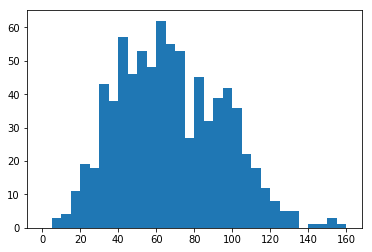

In [2]:
bins = np.arange(0, df["speed"].max()+5, 5)
plt.hist(data = df, x="speed",bins=bins,);

### 设置 figure 对象

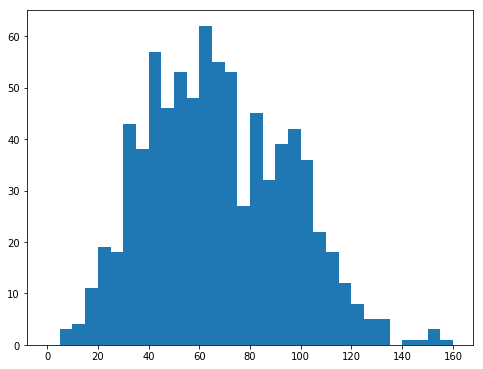

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([.125,.125,.775,.775])
ax.hist(data = df, x = "speed",bins = bins);

### Use seaborn

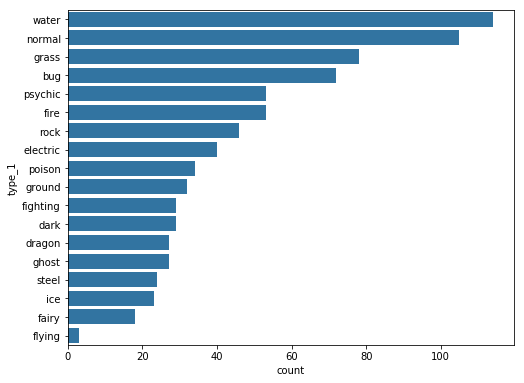

In [15]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([.125,.125,.775,.775])
base_color = sb.color_palette()[0]
sort_values = df.type_1.value_counts().index
sb.countplot(data=df, y="type_1",color=base_color,ax=ax,order=sort_values);

### 图片的组合

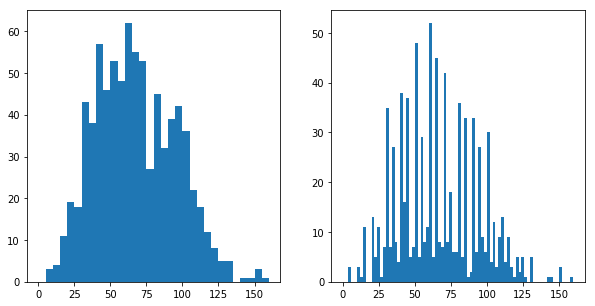

In [23]:
plt.figure(figsize = [10,5])

plt.subplot(1,2,1)  # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df["speed"].max()+5,5)
plt.hist(data = df, x = "speed", bins = bin_edges);

plt.subplot(1,2,2)
bin_edges = np.arange(0, df["speed"].max()+2,2)
plt.hist(data = df, x='speed', bins = bin_edges);

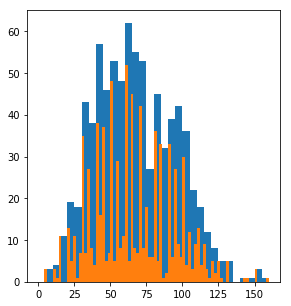

In [24]:
plt.figure(figsize = [10,5])

plt.subplot(1,2,1)  # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df["speed"].max()+5,5)
plt.hist(data = df, x = "speed", bins = bin_edges);

#plt.subplot(1,2,2)
bin_edges = np.arange(0, df["speed"].max()+2,2)
plt.hist(data = df, x='speed', bins = bin_edges);

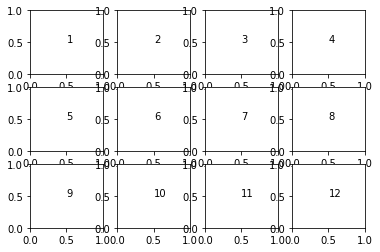

In [26]:
fig, axes = plt.subplots(3,4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3X4 array into 12 elements vectors
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5,0.5,i+1) # print conventional subplot index number to middle of Axes

### Outliers and Axis Limits

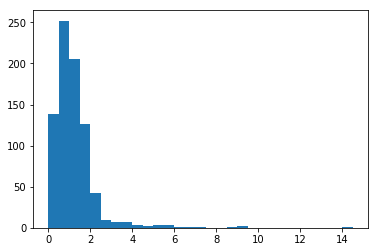

In [27]:
bins = np.arange(0, df["height"].max()+0.5, 0.5)
plt.hist(data=df, x='height',bins=bins);

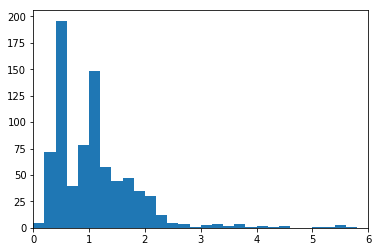

In [29]:
bins = np.arange(0, df["height"].max()+0.2, 0.2)
plt.hist(data=df, x='height',bins=bins);
plt.xlim(0,6);

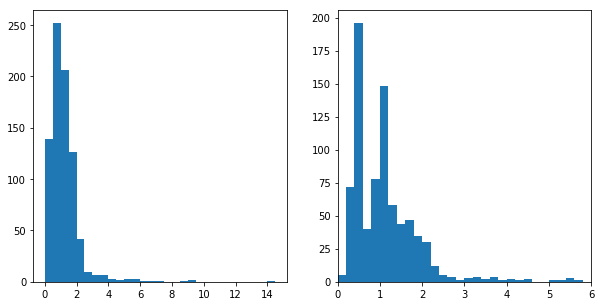

In [30]:
plt.figure(figsize=[10,5])

# histogram on left : full data
plt.subplot(1,2,1)
bin_edges=np.arange(0, df["height"].max()+0.5,0.5)
plt.hist(data=df, x="height", bins = bin_edges);

# histogram on right: focus in on bulk of data <6
plt.subplot(1,2,2)
bin_edges = np.arange(0, df["height"].max()+0.2,0.2)
plt.hist(data=df, x="height",bins = bin_edges);
plt.xlim(0,6);

### Scales and Transformations

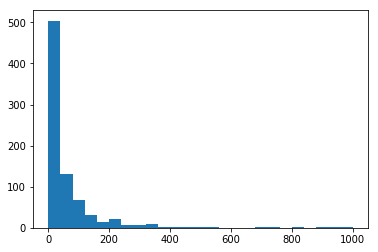

In [40]:
df = pd.read_csv("pokemon.csv")
bins = np.arange(0,df['weight'].max()+40,40)
plt.hist(data = df , x="weight", bins=bins);

Text(0.5,0,'log(values)')

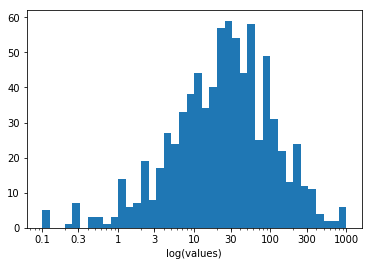

In [47]:
# log
bins = 10**np.arange(-1,3+0.1,0.1)
ticks =[0.1,0.3,1,3,10,30,100,300,1000]
labels =["{}".format(v) for v in ticks]
plt.hist(data = df , x="weight", bins=bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('log(values)')

In [42]:
np.log10(df["weight"].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

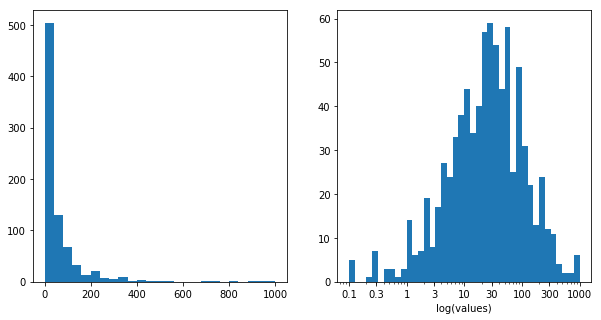

In [49]:
plt.figure(figsize = [10, 5])

# histogram on left: natural units
plt.subplot(1, 2, 1)
bins = np.arange(0,df['weight'].max()+40,40)
plt.hist(data = df , x="weight", bins=bins);

# histogram on right: directly log-transform data
plt.subplot(1, 2, 2)
bins = 10**np.arange(-1,3+0.1,0.1)
ticks =[0.1,0.3,1,3,10,30,100,300,1000]
labels =["{}".format(v) for v in ticks]
plt.hist(data = df , x="weight", bins=bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('log(values)');

### 密度分布

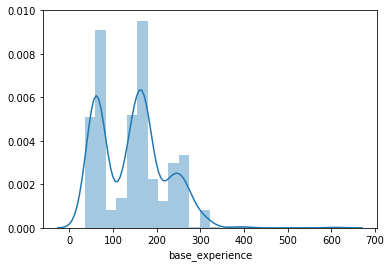

In [53]:
sb.distplot(df["base_experience"])

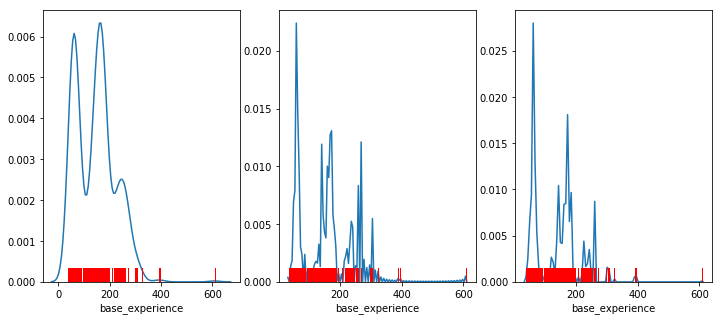

In [54]:
plt.figure(figsize=[12,5])

# left plot
plt.subplot(1,3,1)
sb.distplot(df["base_experience"], hist=False, rug=True, rug_kws={"color":"r"});

plt.subplot(1,3,2)
sb.distplot(df["base_experience"],hist=False,rug=True, rug_kws={"color":'r'},
           kde_kws = {"bw":1})

plt.subplot(1,3,3)
sb.distplot(df["base_experience"],hist=False,rug=True, rug_kws={"color":'r'},
           kde_kws = {"bw":1.5,"kernel":"tri"})